In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: module 'tensorflow' has no attribute 'compat'

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10

In [ ]:
type(cifar10)

##  Load Data

In [ ]:
data = cifar10.load_data()

In [ ]:
type(data)

In [ ]:
(X_train,Y_train),(X_test,Y_test)=data

In [ ]:
X_train[0].shape

In [ ]:
X_test.shape

## Normalization 

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
def get_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(filters= 16, kernel_size = 3, input_shape= input_shape ,activation = 'relu', padding = 'same'),
        MaxPooling2D((2,2)),
        Conv2D(filters= 32, kernel_size = 3, input_shape= input_shape ,activation = 'relu', padding = 'same'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation = 'relu'),
        Dropout(0.3),
        Dense(256, activation = 'relu'),
        Dropout(0.3),
        Dense(10, activation = 'softmax')
    ])
    return model

In [ ]:
model = get_model(X_train[0].shape)

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [ ]:
history = model.fit(X_train, Y_train,validation_split=0.15,batch_size = 64, epochs = 5)

In [ ]:
history = pd.DataFrame(history.history)

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Loss','Val_loss'])

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy','Val_accuracy'])

In [ ]:
model.evaluate(X_test,Y_test, verbose=2)

In [ ]:
model.predict(X_train[0])

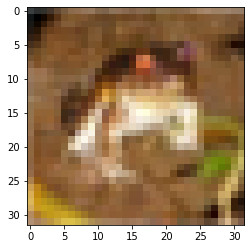

In [115]:
plt.imshow(X_train[0])

In [113]:
tf.__version__

'2.0.0'